In [1]:
import pandas as pd
import pyodbc as py
connection_string = (    
    r'Driver={SQL Server};'
    r'Server=LAPTOP-LD74USH0\SQLEXPRESS;'
    r'Integrated Security=SSPI;'
    r'Trusted_Connection=yes;'
)
pd.set_option('display.max_columns', None)

In [26]:
import seaborn as sns
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def sql2df(query, params=[], parse_dates=None, dsn='SQLEXPRESS'):
        with py.connect(connection_string, readonly=True) as conn:
            return pd.read_sql(query, conn, params=params, parse_dates=parse_dates)

In [3]:
df = sql2df('''
SELECT * FROM Seminar.dbo.cleaned_bol_data_full;
''')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772950 entries, 0 to 4772949
Data columns (total 78 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   orderDate                         object        
 1   productId                         object        
 2   sellerId                          object        
 3   totalPrice                        float64       
 4   quantityOrdered                   int64         
 5   countryCode                       object        
 6   cancellationDate                  object        
 7   cancellationReasonCode            object        
 8   promisedDeliveryDate              object        
 9   shipmentDate                      object        
 10  transporterCode                   object        
 11  transporterName                   object        
 12  transporterNameOther              object        
 13  dateTimeFirstDeliveryMoment       datetime64[ns]
 14  fulfilmentType    

In [17]:
#Change type of columns
dtype = {'calculationDefinitive': bool,
         'noCancellation': bool,
         'noCase': bool,
         'hasOneCase': bool,
         'hasMoreCases': bool,
         'noReturn': bool,
         'orderWeekend': bool,
         'orderCorona': bool,
         'countryCodeNL': bool,
         'fulfilmentByBol': bool,
         'countryOriginNL': bool,
         'countryOriginBE': bool,
         'countryOriginDE': bool,
         'orderMonday': bool,
         'orderTuesday': bool,
         'orderWednesday': bool,
         'orderThursday': bool,
         'orderFriday': bool,
         'orderSaturday': bool,
         'orderSunday': bool,
         'orderJanuary': bool,
         'orderFebruary': bool,
         'orderMarch': bool,
         'orderApril': bool,
         'orderMay': bool,
         'orderJune': bool,
         'orderJuly': bool,
         'orderAugust': bool,
         'orderSeptember': bool,
         'orderOctober': bool,
         'orderNovember': bool,
         'orderDecember': bool}

df = df.astype(dtype)

#Transform dates to date-type
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')
df['cancellationDate'] = pd.to_datetime(df['cancellationDate'], errors='coerce')
df['promisedDeliveryDate'] = pd.to_datetime(df['promisedDeliveryDate'], errors='coerce')
df['shipmentDate'] = pd.to_datetime(df['shipmentDate'], errors='coerce')
df['dateTimeFirstDeliveryMoment'] = pd.to_datetime(df['dateTimeFirstDeliveryMoment'], errors='coerce')
df['startDateCase'] = pd.to_datetime(df['startDateCase'], errors='coerce')
df['returnDateTime'] = pd.to_datetime(df['returnDateTime'], errors='coerce')
df['registrationDateSeller'] = pd.to_datetime(df['registrationDateSeller'], errors='coerce')

df.dtypes

orderDate             datetime64[ns]
productId                     object
sellerId                      object
totalPrice                   float64
quantityOrdered                int64
                           ...      
orderSeptember                  bool
orderOctober                    bool
orderNovember                   bool
orderDecember                   bool
productTitleLength             int64
Length: 78, dtype: object

In [20]:
df.head()

,orderDate,productId,sellerId,totalPrice,quantityOrdered,countryCode,cancellationDate,cancellationReasonCode,promisedDeliveryDate,shipmentDate,transporterCode,transporterName,transporterNameOther,dateTimeFirstDeliveryMoment,fulfilmentType,startDateCase,cntDistinctCaseIds,returnDateTime,quantityReturned,returnCode,productTitle,brickName,chunkName,productGroup,productSubGroup,productSubSubGroup,registrationDateSeller,countryOriginSeller,currentCountryAvailabilitySeller,calculationDefinitive,noCancellation,onTimeDelivery,noCase,hasOneCase,hasMoreCases,noReturn,detailedMatchClassification,generalMatchClassification,determinantClassification,orderYear,orderMonth,orderYearMonth,orderWeekday,orderWeekend,orderCorona,transporterFeature,partnerSellingMonths,cancellationDays,shipmentDays,promisedDeliveryDays,actualDeliveryDays,caseDays,returnDays,countryCodeNL,fulfilmentByBol,countryOriginNL,countryOriginBE,countryOriginDE,orderMonday,orderTuesday,orderWednesday,orderThursday,orderFriday,orderSaturday,orderSunday,orderJanuary,orderFebruary,orderMarch,orderApril,orderMay,orderJune,orderJuly,orderAugust,orderSeptember,orderOctober,orderNovember,orderDecember,productTitleLength
0,2019-12-06,9000000012387632,656525,53.00,1,NL,NaT,None,2019-12-09,2019-12-06,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,Bresser Optics Hunter 16 x 50 verrekijker BK-7...,Verrekijkers,Verrekijker,Sound and Vision Accessories,Beeld en Geluid Accessoires,Camera Accessoires,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,12,2019-12,5,False,True,UPS,89,NaN,0.0,3,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,52
1,2019-07-07,9200000011323565,656525,56.95,1,NL,NaT,None,2019-07-09,2019-07-08,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,National Geographic Verrekijker 10x50 Porro,Verrekijkers,Verrekijker,Sound and Vision Accessories,Beeld en Geluid Accessoires,Camera Accessoires,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,07,2019-07,7,True,True,UPS,84,NaN,1.0,2,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,43
2,2019-11-25,9200000046125841,656525,16.95,1,NL,NaT,None,2019-11-27,2019-11-26,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,"National Geographic 4x30 BK-7 Zwart, Geel verr...",Verrekijkers,Verrekijker,Sound and Vision Accessories,Beeld en Geluid Accessoires,Camera Accessoires,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,11,2019-11,1,False,True,UPS,88,NaN,1.0,2,NaN,NaN,NaN,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,53
3,2019-08-04,9200000086468758,656525,34.95,1,NL,NaT,None,2019-08-06,2019-08-05,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,Bresser Microscoop preparaten 25 stuks - Biologie,Verrekijkers,Verrekijker,Recreational and Outdoor Toys,Leren en Experimenteren,Leren en Experimenteren,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,08,2019-08,7,True,True,UPS,85,NaN,1.0,2,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,49
4,2019-04-12,1000004001422158,742787,14.99,1,NL,NaT,None,2019-04-16,2019-04-13,TNT_BRIEF,PostNL Briefpost,None,NaT,FBR,NaT,NaN,NaT,NaN,None,The Very Best of the Eagles,Voorbespeelde Audio,Muziek,Music,CD,CD,2013-01-28,NL,NL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,04,2019-04,5,False,True,TNT_BRIEF,75,NaN,1.0,4,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,27


In [27]:
df.describe(include = 'all', datetime_is_numeric = False)

TypeError: describe() got an unexpected keyword argument 'datetime_is_numeric'

In [22]:
#Calculate totals per Match Determinant
totalCase = df['caseDays'].count()
totalReturn = df['returnDays'].count()
totalCancel = df['cancellationDays'].count()
totalPromisedDelivery = df['promisedDeliveryDays'].count()
totalDelivery = df['actualDeliveryDays'].count()

In [23]:
#Create table for plot
periodTable = pd.concat([df['caseDays'].value_counts().sort_index(),
                         df['returnDays'].value_counts().sort_index(),
                         df['cancellationDays'].value_counts().sort_index(),
                         df['actualDeliveryDays'].value_counts().sort_index()],axis=1)

In [24]:
#Create percantages per day and calculate running sum
periodTable['caseDays%'] = (periodTable['caseDays'] / totalCase).cumsum()
periodTable['returnDays%'] = (periodTable['returnDays'] / totalReturn).cumsum()
periodTable['cancellationDays%'] = (periodTable['cancellationDays'] / totalCancel).cumsum()
periodTable['actualDeliveryDays%'] = (periodTable['actualDeliveryDays'] / df.shape[0]).cumsum()

In [29]:
### Plot parameters
plt.rcParams.update({'font.size': 18})

# Turn interactive plotting off
plt.ioff()

# Color palettes
color1 = ['#364958','#3b6064','#55828b','#87bba2','#c9e4ca']
color2 = ['#051923','#003554','#006494','#0582ca','#00a6fb']
color3 = ['#fb8500','#ffb703','#023047','#219ebc','#8ecae6']
color4 = ['#0e1236','#21538e','#92bdd8','#99c244','#54c244']
COLOR = color4

### Plotten
plt.figure(figsize = (17,9))

plt.plot(periodTable['caseDays%'], color=COLOR[0], marker = 'o', linewidth=3)
plt.plot(periodTable['returnDays%'], color=COLOR[1], marker = 'o', linewidth=3)
plt.plot(periodTable['cancellationDays%'], color=COLOR[2], marker = 'o', linewidth=3)
plt.plot(periodTable['actualDeliveryDays%'], color=COLOR[4], marker = 'o', linewidth=3)

### Titel
plt.title('', fontweight = 'bold')

### Assen
plt.ylabel('% Available', fontweight = 'bold')
plt.ylim(0,1.0)

plt.xlabel('Days after order', fontweight = 'bold')
plt.xlim(-0.1, 30.1)
#plt.xticks(x,('tick_1', 'tick_2', 'tick_3', 'tick_4'))

#plt.axvline(x=5, color='red')

### Grafiek Lay-out
plt.grid(color='#C0C0C0', linestyle='-', linewidth=1, axis = 'y')
plt.legend(('Case', 'Return', 'Cancel', 'Delivery'),loc='lower right')
plt.tick_params(direction='out', length=0, colors='black')
sns.despine(left=False, bottom=False, right=True)

plt.savefig('plot.png',dpi = 300)
#plt.show()

In [30]:
def createColumns(df,X):
    """
    Function to create dynamic columns based on the prediction period.
    X = number of days after order date
    """
    
    dynamic_cols = ['caseDays','returnDays','cancellationDays','actualDeliveryDays']
    
    for col in dynamic_cols:
        
        dynamic_colname = col+'_'+str(X)
        df[dynamic_colname] = df[col].dt.days
        df[dynamic_colname] = df[dynamic_colname].apply(lambda x: x if x <= X else None)
        
    return df

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [32]:
#Categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['productId', 'sellerId', 'countryCode', 'cancellationReasonCode', 'transporterCode', 'transporterName', 'transporterNameOther', 'fulfilmentType', 'returnCode', 'productTitle', 'brickName', 'chunkName', 'productGroup', 'productSubGroup', 'productSubSubGroup', 'countryOriginSeller', 'currentCountryAvailabilitySeller', 'onTimeDelivery', 'detailedMatchClassification', 'generalMatchClassification', 'determinantClassification', 'orderMonth', 'orderYearMonth', 'transporterFeature']


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=0,
                             class_weight='balanced')

X = ['totalPrice','quantityOrdered','promisedDeliveryDays','orderCorona','partnerSellingMonths',
        'countryCodeNL', 'fulfilmentByBol', 'countryOriginNL', 'countryOriginBE', 'countryOriginDE', 'orderWeekend',
        'orderMonday','orderTuesday', 'orderWednesday', 'orderThursday', 'orderFriday', 'orderSaturday', 'orderSunday',
        'orderJanuary', 'orderFebruary', 'orderMarch', 'orderApril', 'orderMay', 'orderJune', 'orderJuly',
        'orderAugust', 'orderSeptember', 'orderOctober', 'orderNovember', 'orderDecember', 'productTitleLength']
y = ['generalMatchClassification']
    
df_test = df[X+y].dropna()

clf = clf.fit(df_test[X],df_test[y])

prediction = clf.predict(df_test[X])

print("Accuracy:",metrics.accuracy_score(df_test[y], prediction))

Accuracy: 0.9141690149697776


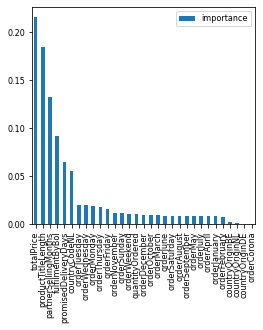

In [39]:
plt.rcParams.update({'font.size': 8})
importanceDF = pd.DataFrame(clf.feature_importances_,index=X,columns=['importance']).sort_values('importance',ascending=False)
importanceDF.plot.bar(figsize=(4,4))
plt.show()

In [40]:
print(metrics.classification_report(df_test[y], prediction))

              precision    recall  f1-score   support

 KNOWN HAPPY       0.98      0.90      0.94   2685606
     UNHAPPY       0.63      0.90      0.74    569696
     UNKNOWN       0.96      0.94      0.95   1517648

    accuracy                           0.91   4772950
   macro avg       0.86      0.91      0.88   4772950
weighted avg       0.93      0.91      0.92   4772950

